In [1]:
import numpy as py
import random as random
import matplotlib.pyplot as plt


from Coord import *
from Submarine import *
from Merchant_Ship import Merchant_Ship

In [2]:
t = py.linspace(0,100, num = 1000)

In [3]:
def generate_objects():
    '''Generate objects'''
    Target_1 = Merchant_Ship('Target_1', Coord(random.uniform(0,100),random.uniform(0,100)))
    Hunter_1 = Submarine(Coord(random.uniform(0,100),100),crs = round(random.random())*180, spd = 16)
    Neutral_1 = Merchant_Ship('Neutral_1', Coord(random.uniform(0,100),random.uniform(0,100)))
    return Target_1, Hunter_1, Neutral_1

In [4]:
Target_1, Hunter_1, Neutral_1 = generate_objects()

In [5]:
def contact_picture():
    '''Plots contact picture'''
    plt.plot(Target_1.loc.lon,Target_1.loc.lat, 'ro')
    plt.plot(Hunter_1.loc.lon,Hunter_1.loc.lat, 'go')
    plt.plot(Neutral_1.loc.lon,Neutral_1.loc.lat, 'bo')
    plt.xlim(0,200)
    plt.ylim(0,100)

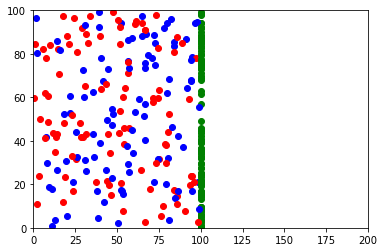

In [6]:
max_plot = 100
for i in range(0,max_plot):
    Target_1, Hunter_1, Neutral_1 = generate_objects()
    contact_picture()

In [7]:
#contact_picture()

,0
0,0


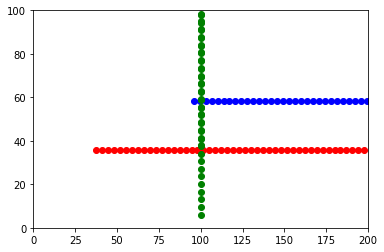

In [8]:
num_sims = 1
detection_history = []


for k in range(1,num_sims+1):
    Target_1, Hunter_1, Neutral_1 = generate_objects()
    target_list = [Target_1, Neutral_1]
    j = 0
    detected_targets = []
    
    while Target_1.loc.lon <= 200:
        Neutral_1.update_position()
        Target_1.update_position()
        Hunter_1.update_position()
        Hunter_1.ping(target_list)
        
        for item in Hunter_1.detections:
            if item not in detected_targets:
                detected_targets.append(item)
    
        j += 1
        if j > 800:
            contact_picture()
            j = 0
    
    detection_history.append(len(detected_targets))
    
#contact_picture()
#detection_history
import pandas as pd
detect = pd.DataFrame(detection_history)
detect

In [ ]:
############################ nothing below this works

In [9]:
def run_simulation(neutral = True, disp = False):
    Target_1, Hunter_1, Neutral_1 = generate_objects()
    target_list = [Target_1, Neutral_1]
    j = 0
    detected_targets = []
    while Target_1.loc.lon <= 200:
        if neutral == True:
            Neutral_1.update_position()
        Target_1.update_position()
        Hunter_1.update_position()
        Hunter_1.ping(target_list)

        for item in Hunter_1.detections:
            if item not in detected_targets:
                detected_targets.append(item)

        j += 1
        if (j > 100) and (disp == True):
            contact_picture()
            j = 0
    det = Hunter_1.detections
    return det, Target_1, Hunter_1, Neutral_1

In [10]:
nreps = 5
det = []
for i in range(1,nreps+1):
    det.append(run_simulation())

In [11]:
det1 = pd.DataFrame(det)

In [12]:
count = 0
for item in det:
    if len(item) > 0:
        count += 1

In [13]:
count/nreps

1.0

In [14]:
nreps = 5
det = []
for i in range(1,nreps+1):
    det.append(run_simulation(neutral = False))

In [15]:
count = 0
for item in det:
    if len(item) > 0:
        count += 1

In [16]:
count/nreps

1.0

([],
 <Merchant_Ship.Merchant_Ship at 0x19372a9cca0>)

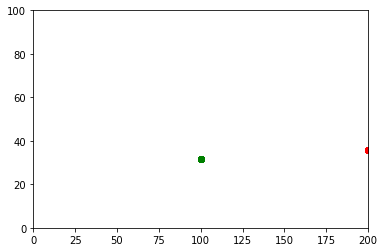

In [17]:
run_simulation(neutral = False, disp =True)

In [18]:
########################### multi target

KeyboardInterrupt: 

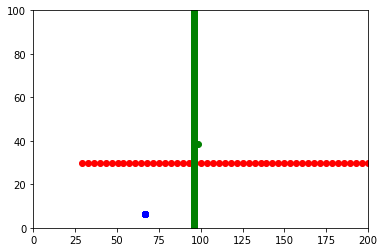

In [21]:
num_sims = 1
detection_history = []


for k in range(1,num_sims+1):
    Target_1, Hunter_1, Neutral_1 = generate_objects()
    Target_2 = Merchant_Ship('Target_2', Coord(random.uniform(0,100),random.uniform(0,100)))
    target_list = [Target_1, Target_2]
    j = 0
    detected_targets = []
    
    while Hunter_1.loc.lon <= 200:
        Target_1.update_position()
        Target_2.update_position()
        Hunter_1.update_position()
        Hunter_1.ping(target_list)
        
        for item in Hunter_1.detections:
            if item not in detected_targets:
                detected_targets.append(item)
    
        j += 1
        if j > 800:
            plt.plot(Target_1.loc.lon,Target_1.loc.lat, 'ro')
            plt.plot(Hunter_1.loc.lon,Hunter_1.loc.lat, 'go')
            plt.plot(Neutral_1.loc.lon,Neutral_1.loc.lat, 'bo')
            plt.xlim(0,200)
            plt.ylim(0,100)
            j = 0
    
    detection_history.append(len(detected_targets))
    
#contact_picture()
#detection_history
import pandas as pd
detect = pd.DataFrame(detection_history)
detect